# Star Wars Survey

While waiting for Star Wars: The Force Awakens, the team at FiveThirtyEight was interested in answering some questions about Star Wars fans.

The team needed to collect data before they could get started answering this question. They used SurveyMonkey, an online survey tool, to survey Star Wars fans. They received 835 responses total.

The data has several columns, including:

* RespondentID -- An anonymized ID of the person taking the survey.
* Gender -- Gender of the respondent.
* Age -- Age of the respondent.
* Household Income -- Income of the respondent.
* Education -- Education level of the respondent.
* Location (Census Region) -- Location of the respondent.
* Have you seen any of the 6 films in the Star Wars franchise? -- Yes or No response.
* Do you consider yourself to be a fan of the Star Wars film franchise? -- Yes or No response.

There are several other columns, which involve questions about the Star Wars movies.

## Reading and exploring the dataset

In [27]:
import pandas as pd

star_wars_survey = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
print(star_wars_survey.head())

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           Response                      
1                                                Yes                      
2                                                NaN                      
3                                                 No                      
4                                                Yes                      

  Which of the following Star Wars films have you seen? Please selec

In [28]:
star_wars_survey.columns.tolist()

['RespondentID',
 'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?',
 'Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do you consider yourself to be a fan of the Expan

In [29]:
star_wars_survey.shape

(1187, 38)

## Removing rows without a RespondentID

In [30]:
star_wars_survey = star_wars_survey[star_wars_survey['RespondentID'].notnull()]
print(star_wars_survey.head())

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                                Yes                      
2                                                NaN                      
3                                                 No                      
4                                                Yes                      
5                                                Yes                      

  Which of the following Star Wars films have you seen? Please selec

## Cleaning the dataset

In [31]:
star_wars_survey['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [32]:
star_wars_survey['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [33]:
yes_no = { \
    "Yes": True,\
    "No": False \
}
star_wars_survey['Have you seen any of the 6 films in the Star Wars franchise?'] = \
star_wars_survey['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars_survey['Do you consider yourself to be a fan of the Star Wars film franchise?'] = \
star_wars_survey['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
print(star_wars_survey.head())

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True             
2  3.292880e+09                                              False             
3  3.292765e+09                                               True             
4  3.292763e+09                                               True             
5  3.292731e+09                                               True             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

  Which of the following Star Wars films have you seen? Please selec

In [34]:
star_wars_survey['Which of the following Star Wars films have you seen? Please select all that apply.'].value_counts()

Star Wars: Episode I  The Phantom Menace    673
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

In [35]:
star_wars_survey['Unnamed: 4'].value_counts()

Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64

In [36]:
star_wars_survey['Unnamed: 5'].value_counts()

Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64

In [37]:
star_wars_survey['Unnamed: 6'].value_counts()

Star Wars: Episode IV  A New Hope    607
Name: Unnamed: 6, dtype: int64

In [38]:
star_wars_survey['Unnamed: 7'].value_counts()

Star Wars: Episode V The Empire Strikes Back    758
Name: Unnamed: 7, dtype: int64

In [39]:
star_wars_survey['Unnamed: 8'].value_counts()

Star Wars: Episode VI Return of the Jedi    738
Name: Unnamed: 8, dtype: int64

In [40]:
import numpy as np

def star_wars_films(film_name, col_name, new_col_name):
    global star_wars_survey
    true_false={ \
        film_name : True, \
                None : False \
    }
    star_wars_survey[col_name] = star_wars_survey[col_name].map(true_false)
    star_wars_survey = star_wars_survey.rename(columns={col_name:new_col_name})
    return

for i in np.arange(3,9): 
    star_wars_films(star_wars_survey.iloc[:,i].value_counts().index[0], star_wars_survey.columns[i], "seen_"+str(i-2))

print(star_wars_survey.head())

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True             
2  3.292880e+09                                              False             
3  3.292765e+09                                               True             
4  3.292763e+09                                               True             
5  3.292731e+09                                               True             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

  seen_1 seen_2 seen_3 seen_4 seen_5 seen_6  \
1   True   True   Tru

## Bar chart of the average rankings of the Star Wars films

In [41]:
def star_wars_rankings(col_name, new_col_name):
    global star_wars_survey
    star_wars_survey[col_name] = star_wars_survey[col_name].astype(float)
    star_wars_survey = star_wars_survey.rename(columns={col_name:new_col_name})
    return

for i in np.arange(9,15): 
    star_wars_rankings(star_wars_survey.columns[i], "ranking_"+str(i-8))

star_wars_survey.iloc[:,9:15].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


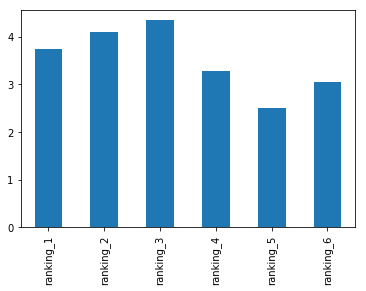

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

star_wars_survey.iloc[:,9:15].mean().plot.bar()
plt.show()

## What's been done so far -

1. We have read the star wars survey csv data file into a pandas dataframe.

2. We ran some code to understand the data's structure and content better.

3. We cleaned up the data:

    a. Removed all rows with null 'RespondentID'.
    
    b. Converted 'Yes' and 'No' to True and False or Boolean for these survey questions - 'Have you seen any of the 6 films in the Star Wars franchise?' and 'Do you consider yourself to be a fan of the Star Wars film franchise?'.
    
    c. Converted star wars film name to True and null value to False for the survey question - 'Which of the following Star Wars films have you seen? Please select all that apply.'
    
    d. Renamed columns 4 to 9 to 'seen_1' to 'seen_6' pertaining to the survey question in (c) above.
    
    e. Converted data type to float for the values in columns 10 to 15 which are responses to the survey question - 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.'
    
    f. Renamed columns 10 to 15 to 'ranking_1 to 'ranking_6' pertaining to the survey question in (e) above.
4. We plotted a bar chart of the means/ averages of the star wars film rankings.

    a. 'Star Wars: Episode V The Empire Strikes Back' was ranked the highest on average.
    
    b. 'Star Wars: Episode III Revenge of the Sith' was ranked the lowest on average.
    
    c. On average Episodes IV, V and VI were ranked higher than I, II and III.

## Bar chart of the total people who have seen the Star Wars films

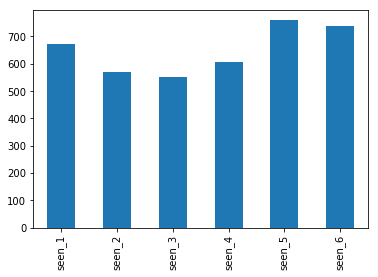

In [43]:
star_wars_survey.iloc[:,3:9].sum().plot.bar()
plt.show()

Star Wars Episode V: The Empire Strikes Back is the most watched film in the Star Wars movie series. More people have watch Episodes IV, V and VI than the first three Episodes. This result is the same as the one that came out of the rankings.

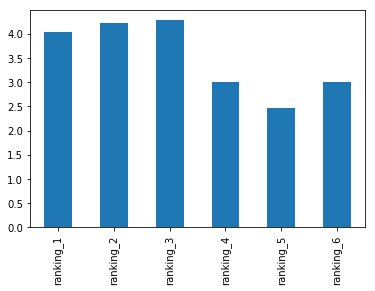

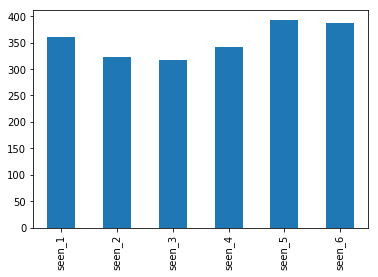

In [44]:
def rankings_seen_bar(data):
    data.iloc[:,9:15].mean().plot.bar()
    plt.show()
    data.iloc[:,3:9].sum().plot.bar()
    plt.show()

rankings_seen_bar(star_wars_survey[star_wars_survey["Gender"] == "Male"])

Bar charts of the rankings and movies seen/ watched are identical in terms of the distribution between the males only and the overall dataset.

## Comparing the rankings and movies seen between males and females

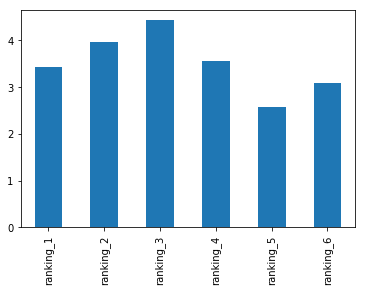

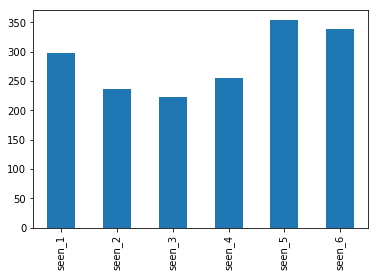

In [45]:
rankings_seen_bar(star_wars_survey[star_wars_survey["Gender"] == "Female"])

Bar charts of the rankings and movies seen/ watched are identical in terms of the distribution between the females only and the overall dataset.

## Comparing the rankings and movies seen between star wars fans and non-fans

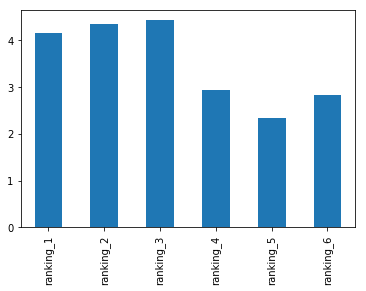

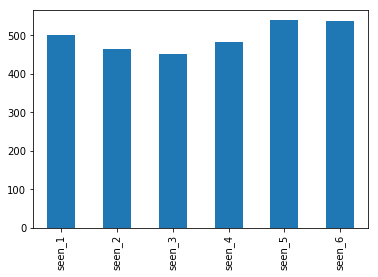

In [46]:
rankings_seen_bar(star_wars_survey[star_wars_survey["Do you consider yourself to be a fan of \
the Star Wars film franchise?"] == True])

Bar charts of the rankings and movies seen/ watched are identical in terms of the distribution between the true star wars fans and the overall dataset.

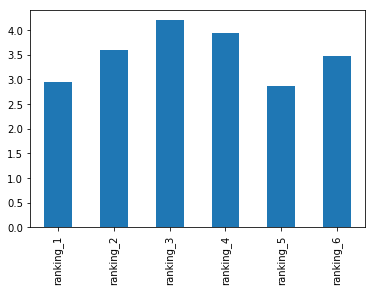

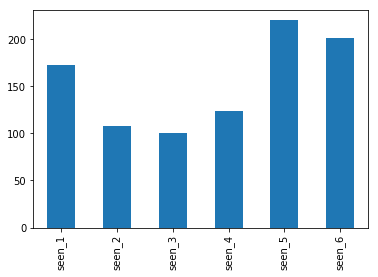

In [47]:
rankings_seen_bar(star_wars_survey[star_wars_survey["Do you consider yourself to be a fan of \
the Star Wars film franchise?"] == False])

It's interesting to notice that the respondents who are not fans of the Star Wars film franchise have ranked episodes I and II higher than episodes VI and IV, respectively. Episode V is still the highest ranked and episode III the lowest. It is also interesting to note that more of the respondents have watched Episodes I and II when compared to Episodes IV and VI.

## Comparing the rankings and movies seen between star trek fans and non-fans

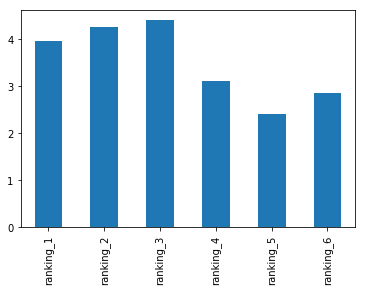

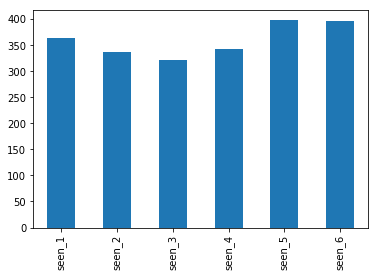

In [48]:
rankings_seen_bar(star_wars_survey[star_wars_survey["Do you consider yourself to be a fan \
of the Star Trek franchise?"] == 'Yes'])

Bar charts of the rankings and movies seen/ watched are identical in terms of the distribution between the star trek fans and the overall dataset.

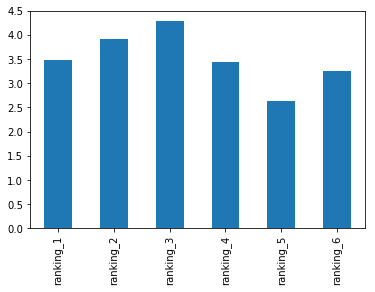

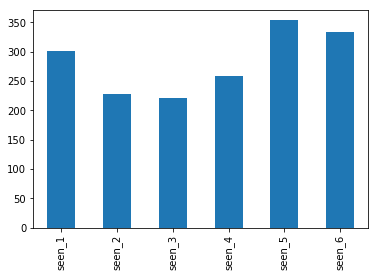

In [49]:
rankings_seen_bar(star_wars_survey[star_wars_survey["Do you consider yourself to be a fan \
of the Star Trek franchise?"] == 'No'])

Bar charts of the rankings and movies seen/ watched are identical in terms of the distribution between those who are not star trek fans and the overall dataset.

## Next steps

Try to segment the data by columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
Clean up columns 15 to 29, which have to do with what characters are viewed favorably and unfavorably.
Which character is the most liked?
Which character is the most disliked?
Which character creates the most controversy? (split between dislikes and likes)
